In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for beautiful plots — because beauty honors the community!
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 🌿 Ubuntu Hospital Dataset: "We care because we are together."
data = {
    'Patient_ID': range(1, 101),
    'Age': np.random.randint(1, 90, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Condition': np.random.choice(['Flu', 'Diabetes', 'Hypertension', 'Asthma', 'Healthy'], size=100, p=[0.3, 0.2, 0.2, 0.2, 0.1]),
    'Treatment_Duration_Days': np.random.randint(1, 15, size=100),
    'Satisfaction_Score': np.random.randint(1, 11, size=100),  # 1-10 scale
    'Follow_Up_Needed': np.random.choice([True, False], size=100, p=[0.4, 0.6])
}

# Create DataFrame — our digital village square 🌳
df = pd.DataFrame(data)

print("🏥 Welcome to Ubuntu General Hospital!")
print("Where every patient’s data is honored and cared for.\n")
print(df.head(10))  # Show first 10 villagers (patients)

#save to excel
excel_filename = "ubuntu_hospital_data.xlsx"
df.to_excel(excel_filename, index=False, sheet_name="Patient_records")
print(f"\nData has been saved to {excel_filename}.\n")

#create a summary report
summary_data = {
    "metric": ["Total Patients", "Average Age", "Average Satisfaction Score", "Patients Needing Follow-up"],
    "Value": [len(df), df['Age'].mean(), df['Satisfaction_Score'].mean(), df['Follow_Up_Needed'].mean() * 100]
}
Summary_df = pd.DataFrame(summary_data)

#save summary to excel with multiple sheets
with pd.ExcelWriter('ubuntu_Summary.xlsx', engine='xlsxwriter') as writer:
    Summary_df.to_excel(writer, index=False, sheet_name='Summary_Report')
    df.to_excel(writer, index=False, sheet_name="Patient_records")
    
print("Summary Report: 'Ubuntu_Summary.xlsx'")
print("includes: Patient Records + Community Health Summary - for leaders, healers, and learners!")

🏥 Welcome to Ubuntu General Hospital!
Where every patient’s data is honored and cared for.

   Patient_ID  Age  Gender     Condition  Treatment_Duration_Days  \
0           1   25    Male  Hypertension                        6   
1           2   77  Female  Hypertension                       12   
2           3   20  Female           Flu                        9   
3           4   52    Male  Hypertension                        6   
4           5   61    Male        Asthma                        3   
5           6    1  Female           Flu                        1   
6           7   61    Male        Asthma                       14   
7           8   69  Female           Flu                       14   
8           9   43  Female           Flu                       11   
9          10   67    Male       Healthy                        7   

   Satisfaction_Score  Follow_Up_Needed  
0                   9             False  
1                   2             False  
2                  10 

=== Community Snapshot ===
Total Patients: 100
Average Age: 43.0 years
Most Common Condition: Flu
Average Satisfaction: 5.49/10

=== Gender Harmony ===
Gender
Male      53
Female    47
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_2316\3434188143.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Condition', palette='viridis')
c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


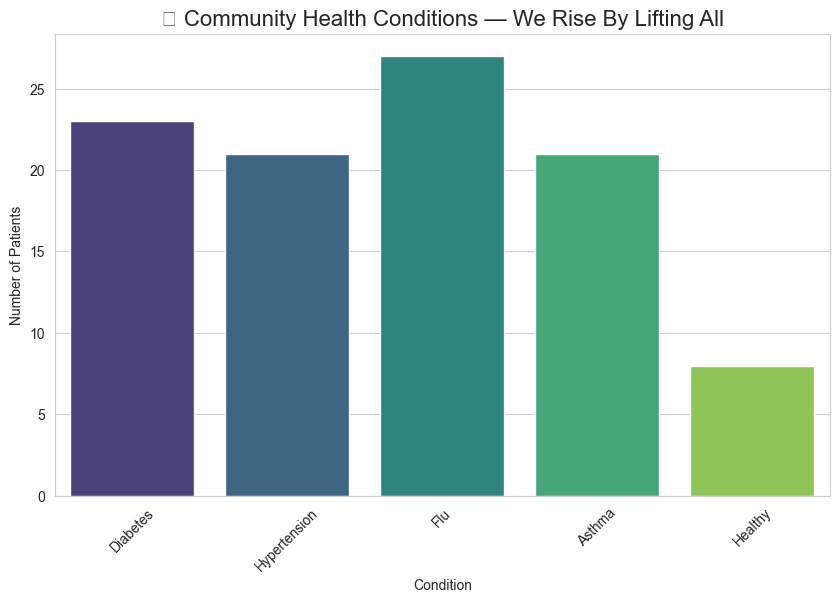

In [10]:
# 🧭 Basic exploration — Who are our patients?
print("=== Community Snapshot ===")
print(f"Total Patients: {len(df)}")
print(f"Average Age: {df['Age'].mean():.1f} years")
print(f"Most Common Condition: {df['Condition'].mode()[0]}")
print(f"Average Satisfaction: {df['Satisfaction_Score'].mean():.2f}/10")

# 📊 Let’s see the gender distribution — balance matters in Ubuntu
print("\n=== Gender Harmony ===")
print(df['Gender'].value_counts())

# 📈 Visualize Conditions — see what the community is facing together
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Condition', palette='viridis')
plt.title("🩺 Community Health Conditions — We Rise By Lifting All", fontsize=16)
plt.xlabel("Condition")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

In [14]:
# 🤕 Introduce some missing data (for teaching purposes)
df.loc[np.random.choice(df.index, size=10), 'Satisfaction_Score'] = np.nan

print("\n=== Before Healing ===")
print(f"Missing Satisfaction Scores: {df['Satisfaction_Score'].isnull().sum()}")

# 🤝 Ubuntu Clean: Fill missing scores with community average — collective care!
avg_satisfaction = df['Satisfaction_Score'].mean()
df['Satisfaction_Score'].fillna(avg_satisfaction, inplace=True)

print("=== After Ubuntu Healing ===")
print(f"Missing Satisfaction Scores: {df['Satisfaction_Score'].isnull().sum()}")
print(f"Filled with community average: {avg_satisfaction:.2f}")


=== Before Healing ===
Missing Satisfaction Scores: 33
=== After Ubuntu Healing ===
Missing Satisfaction Scores: 33
Filled with community average: 5.51


C:\Users\USER\AppData\Local\Temp\ipykernel_2316\2887156540.py:9: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Satisfaction_Score'].fillna(avg_satisfaction, inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_10280\770078617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Condition', y='Treatment_Duration_Days', palette='Set2')
c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


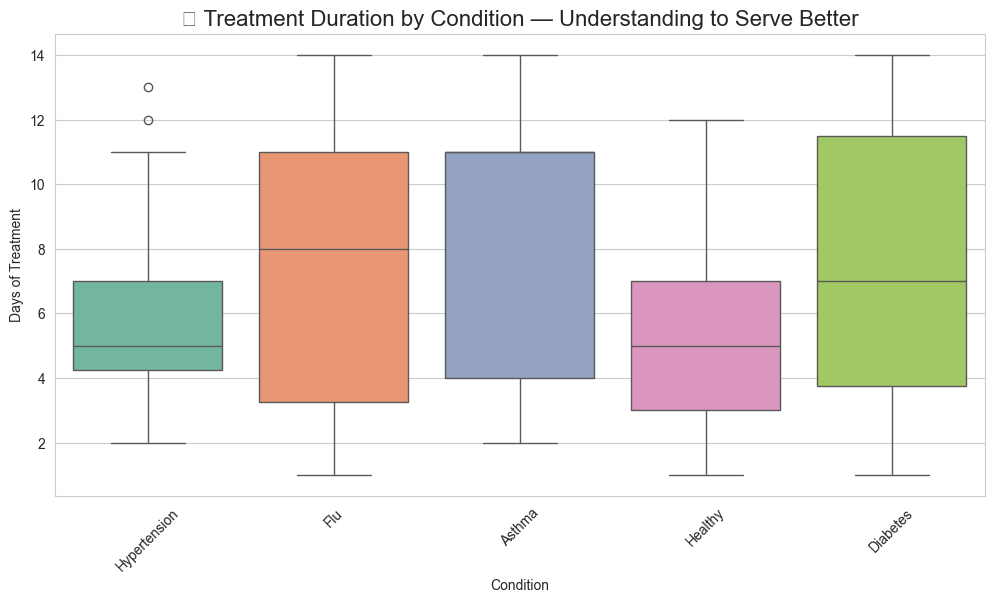


=== Average Treatment Duration by Condition ===
Condition
Asthma          8.68
Diabetes        7.19
Flu             7.38
Healthy         5.44
Hypertension    5.86
Name: Treatment_Duration_Days, dtype: float64


c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128522 (\N{SMILING FACE WITH SMILING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


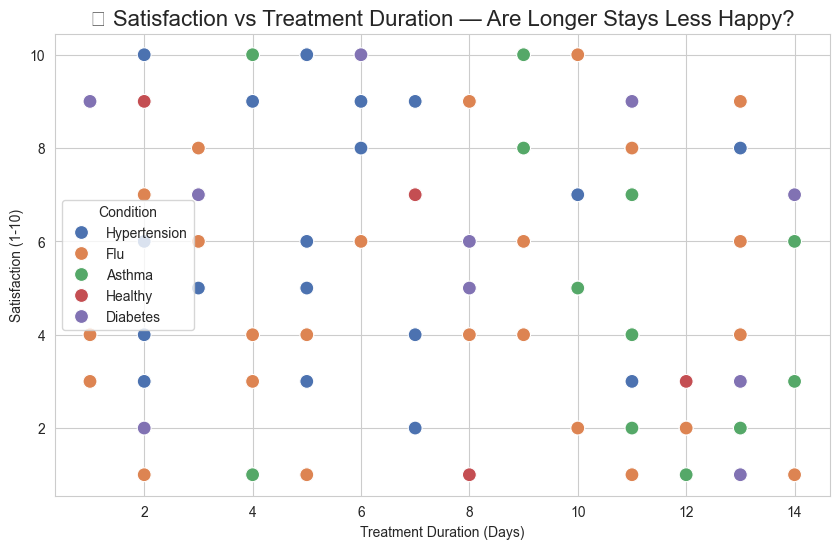


Correlation between Treatment Duration and Satisfaction: -0.12
Slight negative? Maybe longer stays = slightly less happy. Let’s dig deeper together!


In [7]:
# 🧠 Question: Do certain conditions lead to longer treatments?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Condition', y='Treatment_Duration_Days', palette='Set2')
plt.title("⏳ Treatment Duration by Condition — Understanding to Serve Better", fontsize=16)
plt.xlabel("Condition")
plt.ylabel("Days of Treatment")
plt.xticks(rotation=45)
plt.show()

# 💡 Insight: Maybe Asthma patients need longer care? Let's check!
avg_treatment_by_condition = df.groupby('Condition')['Treatment_Duration_Days'].mean()
print("\n=== Average Treatment Duration by Condition ===")
print(avg_treatment_by_condition.round(2))

# ❤️ Question: Is satisfaction linked to treatment duration?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Treatment_Duration_Days', y='Satisfaction_Score', hue='Condition', palette='deep', s=100)
plt.title("😊 Satisfaction vs Treatment Duration — Are Longer Stays Less Happy?", fontsize=16)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Satisfaction (1-10)")
plt.legend(title='Condition')
plt.show()

# 🔢 Correlation check
corr = df['Treatment_Duration_Days'].corr(df['Satisfaction_Score'])
print(f"\nCorrelation between Treatment Duration and Satisfaction: {corr:.2f}")
print("Slight negative? Maybe longer stays = slightly less happy. Let’s dig deeper together!")


=== 🌿 Ubuntu Care Prediction Report ===
              precision    recall  f1-score   support

       False       0.56      0.53      0.54        19
        True       0.25      0.27      0.26        11

    accuracy                           0.43        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.44      0.43      0.44        30



c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


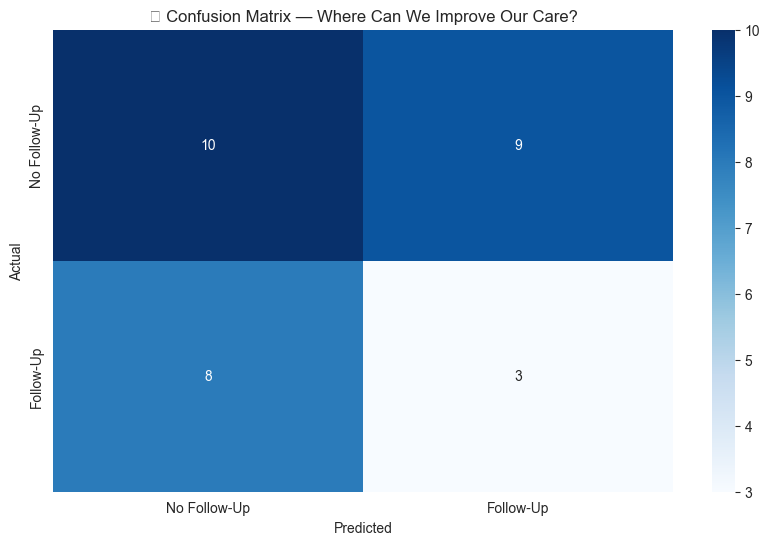

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 🔄 Convert categorical to numeric (so the machine can understand our village)
df_encoded = pd.get_dummies(df, columns=['Condition', 'Gender'], drop_first=True)

# 🎯 Target: Follow_Up_Needed
X = df_encoded.drop(['Follow_Up_Needed', 'Patient_ID'], axis=1)
y = df_encoded['Follow_Up_Needed']

# 🤲 Ubuntu Split: Share data between training (learning) and testing (serving)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🌱 Grow a Forest of Wisdom (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 🎯 Predict
y_pred = model.predict(X_test)

# 📋 Ubuntu Report: How well did we serve?
print("\n=== 🌿 Ubuntu Care Prediction Report ===")
print(classification_report(y_test, y_pred))

# 🖼️ Confusion Matrix — Who did we miss? Let’s learn together.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Follow-Up', 'Follow-Up'], yticklabels=['No Follow-Up', 'Follow-Up'])
plt.title("🔍 Confusion Matrix — Where Can We Improve Our Care?")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [9]:
print("\n🎉 CONGRATULATIONS! You’ve completed the Ubuntu Data Journey.")
print("You didn’t just analyze data — you honored stories, healed gaps, and predicted needs with compassion.")

print("\n🌿 Ubuntu Principles in Your Code:")
print("→ You treated missing data with community averages — no one left behind.")
print("→ You visualized conditions to understand collective burdens.")
print("→ You predicted needs to prepare resources — proactive care.")
print("→ You reflected on meaning, not just metrics.")

print("\n💡 Next Steps:")
print("→ Try this with a real Kaggle health dataset (e.g., ‘Heart Disease UCI’ or ‘Diabetes Health Indicators’).")
print("→ Add more Ubuntu: Ask — ‘Who is not represented in this data?’")
print("→ Share your notebook with a friend. Learning grows when shared.")

print("\n🌍 Because in data, as in life: I am because we are.")


🎉 CONGRATULATIONS! You’ve completed the Ubuntu Data Journey.
You didn’t just analyze data — you honored stories, healed gaps, and predicted needs with compassion.

🌿 Ubuntu Principles in Your Code:
→ You treated missing data with community averages — no one left behind.
→ You visualized conditions to understand collective burdens.
→ You predicted needs to prepare resources — proactive care.
→ You reflected on meaning, not just metrics.

💡 Next Steps:
→ Try this with a real Kaggle health dataset (e.g., ‘Heart Disease UCI’ or ‘Diabetes Health Indicators’).
→ Add more Ubuntu: Ask — ‘Who is not represented in this data?’
→ Share your notebook with a friend. Learning grows when shared.

🌍 Because in data, as in life: I am because we are.
